In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../input/grocery-dataset/bill_all.csv", encoding='windows-1252')

In [3]:
df.head()

,Store_Id,Counter_No,Bill_No,no,time_bill,Date,WEEKDAY,Item_code,Item_Descp,Qty,...,Disc_2,Item_Flag,Free_bee,Division,CP,GM,Category,Sub_Category,Counter_Type,Bill_num
0,6,1,3010000004238,4238,19:43:54,2-Sep-08,3,1200005,GINGER,0.184,...,0.0,N,NaN,FRESH FRUITS & VEG,64.0,3.0,VEGETABLES,REGULAR FRUITS VEGETABLES,Key,3.010000e+12
1,6,1,3010000004238,4238,19:43:54,2-Sep-08,3,1200011,ONION,0.432,...,0.0,N,NaN,FRESH FRUITS & VEG,10.0,2.0,VEGETABLES,REGULAR FRUITS VEGETABLES,Key,3.010000e+12
2,6,1,3010000004238,4238,19:43:54,2-Sep-08,3,1200022,RIDGEGOURD,0.130,...,0.0,N,NaN,FRESH FRUITS & VEG,12.0,1.0,VEGETABLES,REGULAR FRUITS VEGETABLES,Key,3.010000e+12
3,6,1,3010000004238,4238,19:43:54,2-Sep-08,3,1200037,GREENLONGCHILLY,0.092,...,0.0,N,NaN,FRESH FRUITS & VEG,16.0,1.0,VEGETABLES,REGULAR FRUITS VEGETABLES,Key,3.010000e+12
4,6,1,3010000004238,4238,19:43:54,2-Sep-08,3,1200043,CARROT,0.312,...,0.0,N,NaN,FRESH FRUITS & VEG,17.0,2.0,VEGETABLES,REGULAR FRUITS VEGETABLES,Key,3.010000e+12


In [4]:
df.isnull().sum()

Store_Id            0
Counter_No          0
Bill_No             0
no                  0
time_bill           0
Date                0
WEEKDAY             0
Item_code           0
Item_Descp          0
Qty                 0
SP                  0
Tax                 0
Promo_Stat      58698
Disc                0
Net_sales           0
Disc_2              0
Item_Flag           0
Free_bee        53620
Division            0
CP                 20
GM                 20
Category            0
Sub_Category        0
Counter_Type        0
Bill_num            0
dtype: int64

In [5]:
# Selecting only non nan observations
clean_df = df[~df.Promo_Stat.isnull()]

In [6]:
clean_df1 = clean_df[~clean_df.Free_bee.isnull()]

In [7]:
clean_df1.isnull().sum()

Store_Id        0
Counter_No      0
Bill_No         0
no              0
time_bill       0
Date            0
WEEKDAY         0
Item_code       0
Item_Descp      0
Qty             0
SP              0
Tax             0
Promo_Stat      0
Disc            0
Net_sales       0
Disc_2          0
Item_Flag       0
Free_bee        0
Division        0
CP              0
GM              0
Category        0
Sub_Category    0
Counter_Type    0
Bill_num        0
dtype: int64

In [8]:
y = clean_df1['Net_sales']
x = clean_df1[['WEEKDAY', 'Disc_2', 'CP', 'GM']]

In [9]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [10]:
res = sm.OLS(y, x).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Net_sales   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          7.848e+04
Date:                Fri, 05 Aug 2022   Prob (F-statistic):                        0.00
Time:                        06:51:31   Log-Likelihood:                         -30007.
No. Observations:                6261   AIC:                                  6.002e+04
Df Residuals:                    6257   BIC:                                  6.005e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WEEKDAY        0.2343      0.077      3.040      0.002       0.083       0.385
Disc_2         0.7661      0.013     56.882      0.000       0.740       0.792
CP             0.7591      0.005    161.885      0.000       0.750       0.768
GM             1.4119      0.013    108.114      0.000       1.386       1.438
==============================================================================
Omnibus:                    10727.844   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14196690.626
Skew:                          11.702   Prob(JB):                         0.00
Kurtosis:                     235.103   Cond. No.                         35.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

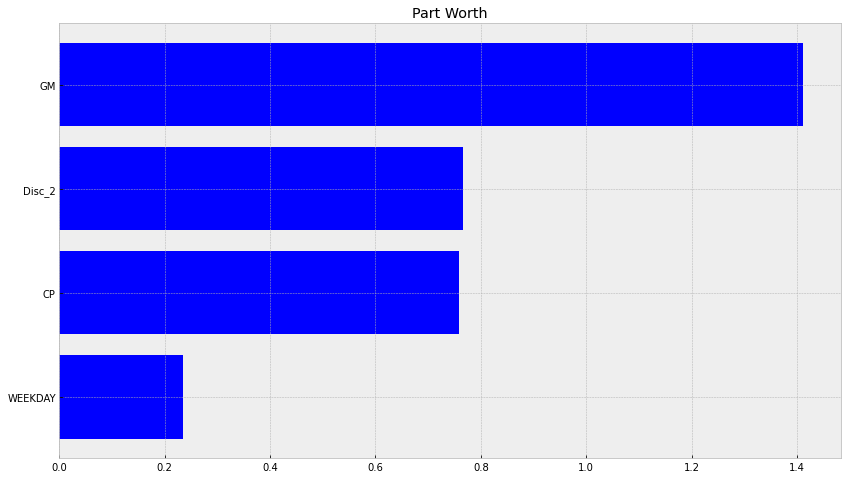

In [12]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

In [13]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    sk =  key.split('_')
    feature = sk[0]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)

In [14]:
# importance per feature is range of coef in a feature
# while range is simply max(x) - min(x)
importance_per_feature = {
    k: max(v) - min(v) for k, v in range_per_feature.items()
}

In [15]:
# compute relative importance per feature
# or normalized feature importance by dividing 
# sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())

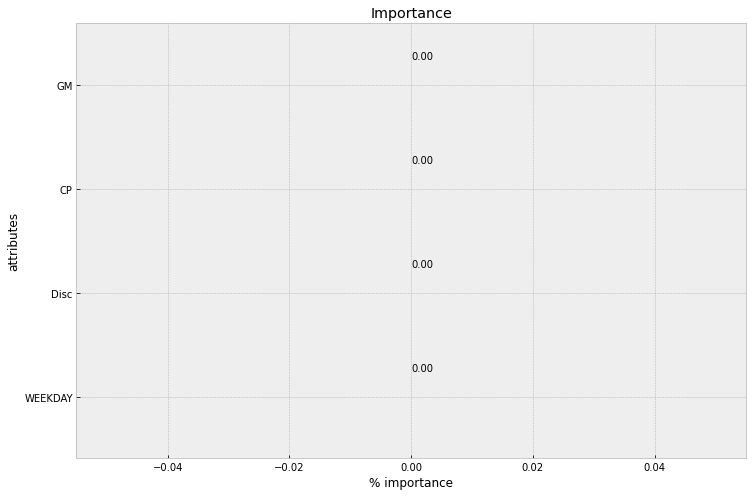

In [16]:
alt_data = pd.DataFrame(
    list(importance_per_feature.items()), 
    columns=['attr', 'importance']
).sort_values(by='importance', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Importance')
plt.barh(xbar, alt_data['importance'])
for i, v in enumerate(alt_data['importance']):
    ax.text(v , i + .25, '{:.2f}'.format(v))
plt.ylabel('attributes')
plt.xlabel('% importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

# Market Basket Analysis

In [17]:
mb = pd.read_csv("../input/grocerycsv/grc11.csv")

In [18]:
mb.head(9)

,citrus fruit,Transaction,semi-finished bread,margarine,ready soups,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,tropical fruit,1,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pip fruit,3,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,other vegetables,4,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,whole milk,5,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,rolls/buns,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,other vegetables,7,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,pot plants,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,whole milk,9,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

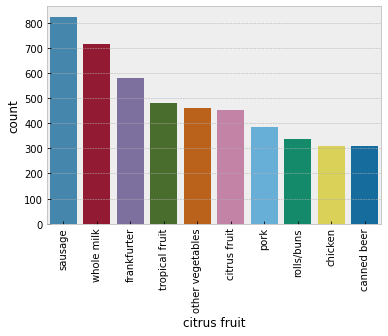

In [20]:
sns.countplot(x = 'citrus fruit', data = mb, order = mb['citrus fruit'].value_counts().iloc[:10].index)
plt.xticks(rotation=90);

In [21]:
df = mb.groupby(['Transaction','citrus fruit']).size().reset_index(name='count')
basket = (df.groupby(['Transaction', 'citrus fruit'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction'))
#The encoding function
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

In [22]:
df.head()

,Transaction,citrus fruit,count
0,1,tropical fruit,1
1,2,whole milk,1
2,3,pip fruit,1
3,4,other vegetables,1
4,5,whole milk,1


In [23]:
basket_sets

citrus fruit,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
basket_sets.columns

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder',
       'bathroom cleaner', 'beef', 'berries',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', name='citrus fruit', length=158)

In [25]:
df2 = basket_sets['citrus fruit'].astype('bool')